# Home assignment

* Author: Romain Tavenard (@rtavenar)
* License: CC-BY-NC-SA

A home assignment from a course on Machine Learning for Time Series at ENSAI.
One can find lecture notes for this course [there](https://rtavenar.github.io/ml4ts_ensai/).

## Problem statement

A time series dataset is provided under the form of several files available from the `data/` folder.
The dataset is called "GesturePebbleZ2" and is described [in this page](http://www.timeseriesclassification.com/description.php?Dataset=GesturePebbleZ2).

You should load the data and analyze it under several angles:

1. provide a fair comparison of a few (well-chosen) deep-learning-based models for the time series classification task at hand;
2. illustrate the use of this data in 1 or 2 other scenarios (clustering, forecasting, ...)

It is not asked here that you implement specific layers / methods by yourself, but rather that you use established implementations of the methods you need.
Your focus should rather be on:
* data preparation, 
* model architecture (for deep networks),
* experiment design,
* result analysis

## Deadline

Deadline for this home assignment is February 26th, 2023.
You should use the link on moodle to hand in your assignment.
A single ipynb file should be provided, 
with execution traces.
This assignment is to be done **individually**.

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
X_train_list=list(csv.reader(open('./data/X_train.txt'),delimiter=";",))
X_test_list=list(csv.reader(open('./data/X_train.txt'),delimiter=";",))
y_train=np.loadtxt("./data/y_train.txt",delimiter=";")
y_test =np.loadtxt("./data/y_train.txt",delimiter=";")

In [3]:
length = max(map(len, X_train_list))
X_train_left=np.array([[0]*(length-len(xi))+xi for xi in X_train_list],dtype=float)
X_train_right=np.array([xi+[0]*(length-len(xi)) for xi in X_train_list],dtype=float)
X_test_left=np.array([[0]*(length-len(xi))+xi for xi in X_test_list],dtype=float)
X_test_right=np.array([xi+[0]*(length-len(xi)) for xi in X_test_list],dtype=float)

In [4]:
y_train=y_train-1
y_test=y_test-1

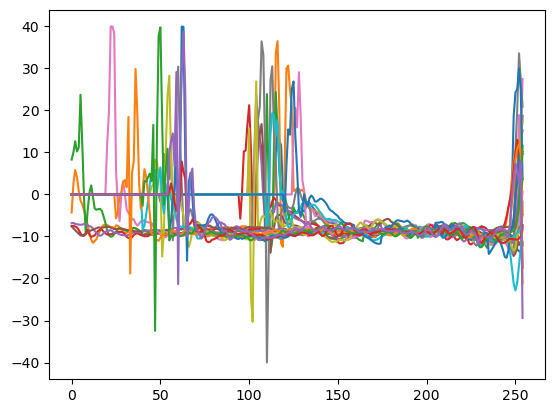

In [5]:
plt.plot(X_train_left[y_train==0,200:].T)
plt.show()

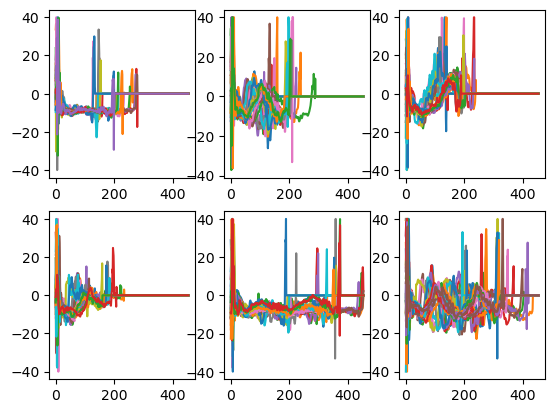

In [17]:
for i in range(0,6):
    plt.subplot(2,3,i+1)
    plt.plot(X_train_right[y_train==i].T)
plt.show()

In [7]:
X_train_left.shape

(146, 455)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.legacy import Adam

In [15]:
cb = EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=1,
    restore_best_weights=True
)
model = Sequential([
    Conv1D(filters=10, kernel_size=3, activation="relu",input_shape=(455,1)),
    MaxPool1D(pool_size=2),
    Conv1D(filters=20, kernel_size=3, activation="relu"),
    MaxPool1D(pool_size=2),
    Flatten(),
    Dense(units=6, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
h = model.fit(X_train_right, y_train, epochs=20, validation_data=(X_test_right, y_test), callbacks=[cb])

Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 1.9736 - accuracy: 0.2740

2023-02-13 12:26:27.271258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 55ms/step - loss: 1.9736 - accuracy: 0.2740 - val_loss: 1.4276 - val_accuracy: 0.4178
Epoch 2/20
5/5 [==============================] - 0s 18ms/step - loss: 1.2654 - accuracy: 0.5205 - val_loss: 0.9601 - val_accuracy: 0.6849
Epoch 3/20
1/5 [=====>........................] - ETA: 0s - loss: 0.8522 - accuracy: 0.7188

2023-02-13 12:26:27.514373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 18ms/step - loss: 0.8736 - accuracy: 0.7192 - val_loss: 0.7364 - val_accuracy: 0.8014
Epoch 4/20
5/5 [==============================] - 0s 18ms/step - loss: 0.6981 - accuracy: 0.8014 - val_loss: 0.5496 - val_accuracy: 0.8425
Epoch 5/20
5/5 [==============================] - 0s 18ms/step - loss: 0.5128 - accuracy: 0.8630 - val_loss: 0.4245 - val_accuracy: 0.8904
Epoch 6/20
5/5 [==============================] - 0s 17ms/step - loss: 0.3915 - accuracy: 0.8973 - val_loss: 0.3048 - val_accuracy: 0.9384
Epoch 7/20
5/5 [==============================] - 0s 16ms/step - loss: 0.2774 - accuracy: 0.9589 - val_loss: 0.2230 - val_accuracy: 0.9863
Epoch 8/20
5/5 [==============================] - 0s 16ms/step - loss: 0.2068 - accuracy: 0.9932 - val_loss: 0.1697 - val_accuracy: 0.9932
Epoch 9/20
5/5 [==============================] - 0s 16ms/step - loss: 0.1576 - accuracy: 0.9932 - val_loss: 0.1286 - val_accuracy: 1.0000
Epoch 10/20
5/5 [=====================

In [16]:
feature_extractors = {
    "Conv_1layer": Sequential([
        Conv1D(filters=10, kernel_size=3, activation="relu",input_shape=(455,1))
    ]),
    "Conv_2layers": Sequential([
        Conv1D(filters=10, kernel_size=3, activation="relu",input_shape=(455,1)),
        Conv1D(filters=10, kernel_size=3, activation="relu"),
    ]),
    "Conv_3layers": Sequential([
        Conv1D(filters=10, kernel_size=3, activation="relu",input_shape=(455,1)),
        Conv1D(filters=10, kernel_size=3, activation="relu"),
        Conv1D(filters=10, kernel_size=3, activation="relu"),
    ]),
    "LSTM_1layer": Sequential([
        LSTM(units=10, return_sequences=True,input_shape=(455,1))
    ]),
    "LSTM_2layers": Sequential([
        LSTM(units=10, return_sequences=True,input_shape=(455,1)),
        LSTM(units=10, return_sequences=True),
    ]),
    "LSTM_3layers": Sequential([
        LSTM(units=10, return_sequences=True,input_shape=(455,1)),
        LSTM(units=10, return_sequences=True),
        LSTM(units=10, return_sequences=True)
    ]),
}

for name, f in feature_extractors.items():
    model = Sequential([
        f,
        Flatten(),
        Dense(units=6, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
    h = model.fit(X_train_left, y_train, epochs=40, verbose=False)
    print(name, model.evaluate(X_test_left, y_test))


2023-02-13 12:26:42.990963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000


2023-02-13 12:26:44.078877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Conv_1layer [0.0011570252245292068, 1.0]


2023-02-13 12:26:44.296680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 1.0000


2023-02-13 12:26:45.563231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Conv_2layers [0.0021092670504003763, 1.0]


2023-02-13 12:26:45.918713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 11ms/step - loss: 7.5242e-04 - accuracy: 1.0000


2023-02-13 12:26:47.330125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Conv_3layers [0.0007524227257817984, 1.0]


2023-02-13 12:26:47.872902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:26:47.948388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:26:48.197903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 20ms/step - loss: 0.0113 - accuracy: 1.0000


2023-02-13 12:26:54.656769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:26:54.691951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


LSTM_1layer [0.011337722651660442, 1.0]


2023-02-13 12:26:55.600632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:26:55.720050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:26:55.756317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:26:55.839118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:26:55.920879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/5 [=====>........................] - ETA: 1s - loss: 0.0105 - accuracy: 1.0000

2023-02-13 12:27:03.803365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:27:03.853715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:27:03.880275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 27ms/step - loss: 0.0198 - accuracy: 1.0000
LSTM_2layers [0.0197976753115654, 1.0]


2023-02-13 12:27:05.273243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:27:05.440562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:27:05.475209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:27:05.522864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:27:05.598306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:27:05.658708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:27:05.724689: I tensorflow/core/grappler/optimizers/cust

1/5 [=====>........................] - ETA: 1s - loss: 0.0097 - accuracy: 1.0000

2023-02-13 12:27:15.928445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:27:15.995806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:27:16.023087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 12:27:16.063048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 33ms/step - loss: 0.0140 - accuracy: 1.0000
LSTM_3layers [0.01402218546718359, 1.0]
